In [1]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TimeML_gold_data = pd.read_csv('TimeML_zero_shot_gold_equal_length_without_commas_fullstops.csv')
TimeML_gold_data.head(10)

,Unnamed: 0,id,token,gold_label
0,0,140201304892672,A,<O>
1,1,140201304229056,Cyprus,<O>
2,2,140201304137408,exit,<EVENT>
3,3,140201304230272,from,<O>
4,4,140201304135680,the,<O>
5,5,140201304889856,euro,<O>
6,6,140201314008192,union,<O>
7,7,140201304135552,if,<O>
8,8,140201303972096,it,<O>
9,9,140201304228928,comes,<EVENT>


In [3]:
gold_tokens = TimeML_gold_data['token']
gold_labels = TimeML_gold_data['gold_label']

In [4]:
TimeML_predicted_data = pd.read_csv('TimeML_zero_shot_predicted_equal_length_without_commas_fullstops.csv')
TimeML_predicted_data.head(10)

,Unnamed: 0,id,token,predicted_label
0,0,140201304892672,A,<O>
1,1,140201304229056,Cyprus,<O>
2,2,140201304137408,exit,<O>
3,3,140201304230272,from,<O>
4,4,140201304135680,the,<O>
5,5,140201304889856,euro,<O>
6,6,140201314008192,union,<O>
7,7,140201304135552,if,<O>
8,8,140201303972096,it,<O>
9,9,140201304228928,comes,<O>


In [5]:
predicted_tokens = TimeML_predicted_data['token']
predicted_labels = TimeML_predicted_data['predicted_label']

In [6]:
predicted_labels

0       <O>
1       <O>
2       <O>
3       <O>
4       <O>
       ... 
6404    <O>
6405    <O>
6406    <O>
6407    <O>
6408    <O>
Name: predicted_label, Length: 6409, dtype: object

In [7]:
gold_labels.value_counts()

<O>        5663
<EVENT>     746
Name: gold_label, dtype: int64

In [8]:
predicted_labels.value_counts()

<O>        6004
<EVENT>     405
Name: predicted_label, dtype: int64

In [9]:
# comparing the LLM's predicted labels to the gold standard
print(classification_report(gold_labels, predicted_labels))

              precision    recall  f1-score   support

     <EVENT>       0.43      0.23      0.30       746
         <O>       0.90      0.96      0.93      5663

    accuracy                           0.88      6409
   macro avg       0.67      0.60      0.62      6409
weighted avg       0.85      0.88      0.86      6409



In [10]:
x = classification_report(gold_labels, predicted_labels)
with open('eval.txt', 'w', encoding = 'utf8') as outfile:
    outfile.write(x)

In [11]:
with open('eval.txt', encoding = 'utf8') as infile:
    text = infile.read()

In [12]:
print(text)

              precision    recall  f1-score   support

     <EVENT>       0.43      0.23      0.30       746
         <O>       0.90      0.96      0.93      5663

    accuracy                           0.88      6409
   macro avg       0.67      0.60      0.62      6409
weighted avg       0.85      0.88      0.86      6409



In [11]:
confusion_matrix(gold_labels, predicted_labels)

array([[ 175,  571],
       [ 230, 5433]], dtype=int64)

In [12]:
data_labels = unique_labels(gold_labels)
print(data_labels)

['<EVENT>' '<O>']


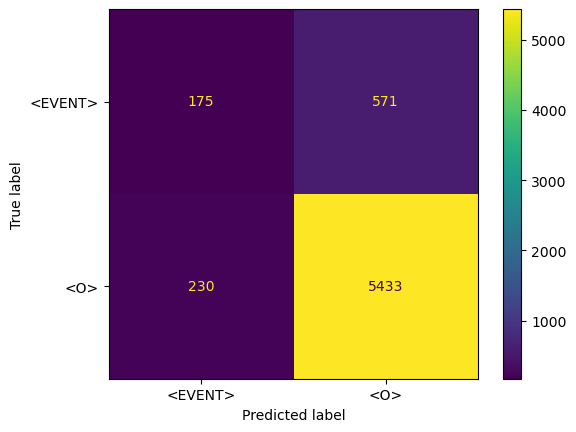

In [13]:
cm = confusion_matrix(gold_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_labels)
disp.plot();

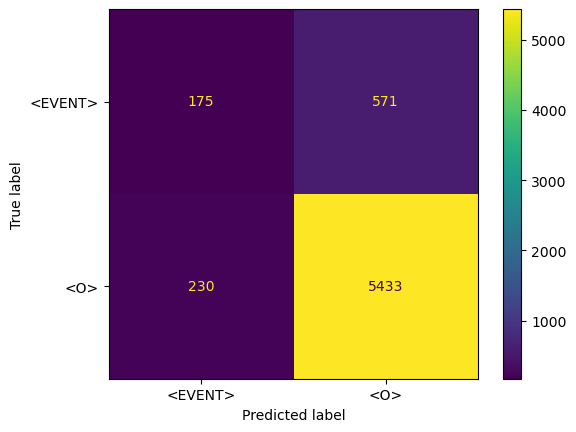

In [16]:
disp.plot().figure_.savefig('confusion_matrix.png')